### Notebook demonstrating the application of GEAGS framework to model layered feedback control 

The data used in this exercise is taken from the study: https://doi.org/10.1038/s41467-022-33058-6

In [94]:
# import all packages here

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.integrate as scint
import lmfit 
from matplotlib.ticker import FuncFormatter

# importing the model ODEs
from LCM_model_equations import run_model
plt.rcParams['font.family'] = 'Arial'  # Or your journal's preferred font

In [95]:
# Importing the experimental data (FL/OD of all replicates)

FL_by_OD_data_all = pd.read_csv("paper_FL_by_OD_data_all.csv")

open_1 = FL_by_OD_data_all["Open_1"].to_numpy()
open_2 = FL_by_OD_data_all["Open_2"].to_numpy()
open_3 = FL_by_OD_data_all["Open_3"].to_numpy()
open_4 = FL_by_OD_data_all["Open_4"].to_numpy()
open_5 = FL_by_OD_data_all["Open_5"].to_numpy()

trans_1 = FL_by_OD_data_all["Trans_1"].to_numpy()
trans_2 = FL_by_OD_data_all["Trans_2"].to_numpy()
trans_3 = FL_by_OD_data_all["Trans_3"].to_numpy()
trans_4 = FL_by_OD_data_all["Trans_4"].to_numpy()
trans_5 = FL_by_OD_data_all["Trans_5"].to_numpy()

cis_1 = FL_by_OD_data_all["Cis_1"].to_numpy()
cis_2 = FL_by_OD_data_all["Cis_2"].to_numpy()
cis_3 = FL_by_OD_data_all["Cis_3"].to_numpy()
cis_4 = FL_by_OD_data_all["Cis_4"].to_numpy()
cis_5 = FL_by_OD_data_all["Cis_5"].to_numpy()

layered_1 = FL_by_OD_data_all["Layered_1"].to_numpy()
layered_2 = FL_by_OD_data_all["Layered_2"].to_numpy()
layered_3 = FL_by_OD_data_all["Layered_3"].to_numpy()
layered_4 = FL_by_OD_data_all["Layered_4"].to_numpy()

FL_open = [open_1, open_2, open_3, open_4, open_5]
FL_trans = [trans_1, trans_2, trans_3, trans_4, trans_5]
FL_cis = [cis_1, cis_2, cis_3, cis_4, cis_5]
FL_layered = [layered_1, layered_2, layered_3, layered_4]

max_FL_open_avg = np.max(np.mean(FL_open, axis = 0))

In [96]:
# Importing the experimental data (Average FL/OD of all replicates)

FL_by_OD_data_avg = pd.read_csv("paper_FL_by_OD_data_avg.csv")

open_avg = FL_by_OD_data_avg["Open"].to_numpy()
cis_avg = FL_by_OD_data_avg["Cis"].to_numpy()
trans_avg = FL_by_OD_data_avg["Trans"].to_numpy()
layered_avg = FL_by_OD_data_avg["Layered"].to_numpy()
time_expt = FL_by_OD_data_avg["Time"].to_numpy()

In [97]:
# Estimate standard deviation 

trans_std_dev = np.std(FL_trans, axis = 0)
cis_std_dev = np.std(FL_cis, axis = 0)
layered_std_dev = np.std(FL_layered, axis = 0)
open_std_dev = np.std(FL_open, axis = 0)

In [98]:
# Estimate confidence intervals

std = 1

trans_upper_limit = trans_avg + trans_std_dev * std
trans_lower_limit = trans_avg - trans_std_dev * std

cis_upper_limit = cis_avg + cis_std_dev * std
cis_lower_limit = cis_avg - cis_std_dev * std


layered_upper_limit = layered_avg + layered_std_dev * std
layered_lower_limit = layered_avg - layered_std_dev * std


open_upper_limit = open_avg + open_std_dev * std
open_lower_limit = open_avg - open_std_dev * std

In [99]:
interval = 10 # min
t_final = 960
N_steps = int(t_final/interval)
time = np.linspace(0, t_final, N_steps)

i_last = -1
tf_i = i_last # last indice to be plotted (simulation)
tf_I = i_last # last indice to be plotted (expt)

p = pd.read_csv("LCM_param_file_042025.csv").to_numpy()
p = p[:,2]

# ## Parameters 
params = lmfit.Parameters()
params.add(name = 'beta_A', value = p[0])#, min = 0.1, max = 20, vary = 1)
params.add(name = 'K_x', value = p[1])#, min = 1e2, max = 5e7, vary = 0)
params.add(name = 'K_R', value = p[2])#, min = 1e-2, max = 1e4, vary = 0)
params.add(name = 'K_lac', value = p[3])#, min = 1e-2, max = 1e4, vary = 1)
params.add(name = 'd_m', value = p[4])#, min = 0.05, max = 0.4, vary = 1)
params.add(name = 'k_tl_cin', value = p[5])#, min = 0.01, max = 5, vary = 1)
params.add(name = 'd_p', value = p[6])#, min = 1e-4, max = 0.01, vary = 1)
params.add(name = 'K_r', value = p[7])#, min = 1e-3, max = 1, vary = 1)
params.add(name = 'beta_B', value = p[8])#, min = 0.1, max = 20, vary = 1)
params.add(name = 'K_cin', value = p[9])#, min = 1e-1, max = 1e4, vary = 1)
params.add(name = 'd_r', value = p[10])#, min = 0.05, max = 0.4, vary = 1)
params.add(name = 'k_fold_fp', value = p[11])#, min = 0.067, max = 0.2, vary = 1)
params.add(name = 'k_fold_lac', value = p[12])#, min = 1e-2, max = 1, vary = 1)
params.add(name = 'x_i', value = p[13])#, min = 1e3, max = 5e7, vary = 0)
params.add(name = 'k_tl_fp', value = p[14])#, min = 0.001, max = 5, vary = 1)
params.add(name = 'k_tl_lac', value = p[15])#, min = 0.001, max = 6, vary = 1)
params.add(name = 'k_fold_r', value = p[16])#, min = 0.01, max = 1, vary = 1)
params.add(name = 'l0_Pcin', value = p[17])#, min = 0, max = 1, vary = 1)

params.add(name = 'Rsrc_max', value = p[18])#, min = 0, max = 1, vary = 1)
params.add(name = 'k_tli_b_lac', value = p[19])#, min = 1e-6, max = 100, vary = True)
params.add(name = 'k_tli_b_fp', value = p[20])#, min = 1e-6, max = 100, vary = True)
params.add(name = 'k_tli_b_cin', value = p[21])#, min = 1e-6, max = 100, vary = True)
params.add(name = 'k_tli_u', value = p[22])#, min = 1, max = 1000, vary = 0)

# RMF parameters
params.add(name = 'b_fold', value = p[23])#, min = 1e-1, max = 1, vary = 1)
params.add(name = 'K_P_total', value = p[24])#, min = 1e-1, max = 1, vary = 1)
params.add(name = 'K_R_total', value = p[25])#, min = 1e-1, max = 1, vary = 1)
params.add(name = 'n_gamma_resources_tx', value = p[26])#, min = 100, max = 1000, vary = True)
params.add(name = 'n_gamma_resources_tl', value = p[27])#, min = 100, max = 1000, vary = True)
params.add(name = 'n_gamma_rate', value = p[28])#, min = 100, max = 1000, vary = True)

# Initial Conditions
params.add(name = 'CinR_0', value = p[29])#, min = 0, max = 1e4, vary = 1)
params.add(name = 'LacI_0', value = p[30])#, min = 0, max = 1e4, vary = 1)
params.add(name = 'FP_0', value = p[31])#, min = 0, max = 1e4, vary = 1)
params.add(name = 'Mcin_0', value = p[32])#, min = 0, max = 1e4, vary = 1)
params.add(name = 'Mg_0', value = p[33])#, min = 0, max = 1e4, vary = 1)

# Growth parameters 
params.add(name = 'C_max', value = p[34], vary = 0)
params.add(name = 'C_0', value = p[35], vary = 0)
params.add(name = 'k_gr', value = p[36], vary = 0)

# Hill coefficients  # Comment it if they are not in the param file
params.add(name = 'n_Cin_actn', value = p[37], min = 0.1, max =5 , vary = 1)          
params.add(name = 'n_Rhl_actn', value = p[38], min = 0.1, max = 5, vary = 1)          
params.add(name = 'n_Hill_delta', value = p[39], min = 0.1, max = 5, vary = 1)        
params.add(name = 'n_Hill_psi', value = p[40], min = 0.1, max = 5, vary = 1)          
params.add(name = 'n_Hill_trans', value = p[41], min = 0.1, max = 5, vary = 1)         
params.add(name = 'n_Hill_cis', value = p[42], min = 0.1, max = 5, vary = 1)      

 # Scaling of K_lac and K_R
params.add(name = 'r_Lac', value = p[43], min = 0.03, max = 0.8, vary = 1)         
params.add(name = 'r_R', value = p[44], min = 0.01, max = 0.8, vary = 1)  
params.add(name = 'r_Cin', value = p[45], min = 0.05, max = 0.8, vary = 1)  


x0 = np.zeros(14)

sol_deg_open, P_total_open = run_model(x0, param = params, loop = 'open', tspan = time)
sol_deg_trans, P_total_trans = run_model(x0, param = params, loop = 'trans', tspan = time)
sol_deg_cis, P_total_cis = run_model(x0, param = params, loop = 'cis', tspan = time)
sol_deg_layered, P_total_layered = run_model(x0, param = params, loop = 'layered', tspan = time)

Text(0, 0.5, 'Protein (scaled)')

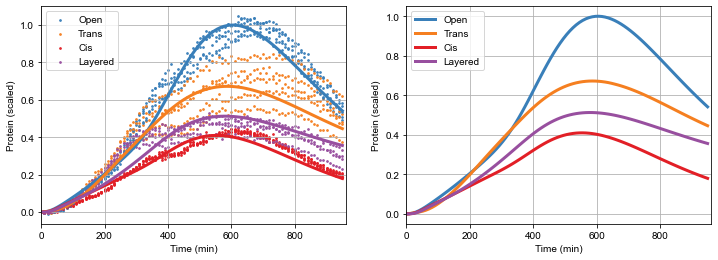

In [100]:
## Plot the Simulation Results

fig, ax = plt.subplots(1,2, figsize = (12,4))
construct_colors = {
    'Open': '#397fb9',
    'Trans': '#f57f20',
    'Cis': '#e21f26',
    'Layered': '#984f9f'
}
r = 0
transparency = 0.9
size = 3
marker = 'o'
for i in range(5):
    ax[r].scatter(time_expt[:tf_I], FL_open[i][:tf_I]/max_FL_open_avg, color = construct_colors['Open'], label = 'Open' if i == 0 else "_nolegend_", alpha = transparency, s = size, marker = marker)
    ax[r].scatter(time_expt[:tf_I], FL_trans[i][:tf_I]/max_FL_open_avg, color = construct_colors['Trans'], label = 'Trans' if i == 0 else "_nolegend_", alpha = transparency, s = size, marker = marker)
    ax[r].scatter(time_expt[:tf_I], FL_cis[i][:tf_I]/max_FL_open_avg, color = construct_colors['Cis'], label = 'Cis' if i == 0 else "_nolegend_", alpha = transparency, s = size, marker = marker)

for i in range(4):
   ax[r].scatter(time_expt[:tf_I], FL_layered[i][:tf_I]/max_FL_open_avg, color = construct_colors['Layered'], label = 'Layered' if i == 0 else "_nolegend_", alpha = transparency, s = size, marker = marker)

ax[r].legend() ; ax[r].grid()
ax[r].set_xlabel('Time (min)') ; ax[r].set_ylabel('FL/OD (Scaled)')

lwd = 3
max_open_fp = np.max(sol_deg_open[:,9][:tf_i])
# r = 0
ax[r].plot(time[:tf_i], sol_deg_open[:,9][:tf_i]/max_open_fp, label = 'Open', color = construct_colors['Open'], linewidth = lwd)
ax[r].plot(time[:tf_i], sol_deg_trans[:,9][:tf_i]/max_open_fp, label = 'Trans', color = construct_colors['Trans'], linewidth = lwd)
ax[r].plot(time[:tf_i], sol_deg_cis[:,9][:tf_i]/max_open_fp, label = 'Cis', color = construct_colors['Cis'], linewidth = lwd)
ax[r].plot(time[:tf_i], sol_deg_layered[:,9][:tf_i]/max_open_fp, label = 'Layered', color = construct_colors['Layered'], linewidth = lwd)
ax[r].set_xlim((0,960))
ax[r].set_xlabel('Time (min)') ; ax[r].set_ylabel('Protein (scaled)')

r = 1
ax[r].plot(time[:tf_i], sol_deg_open[:,9][:tf_i]/max_open_fp, label = 'Open', color = construct_colors['Open'], linewidth = lwd)
ax[r].plot(time[:tf_i], sol_deg_trans[:,9][:tf_i]/max_open_fp, label = 'Trans', color = construct_colors['Trans'], linewidth = lwd)
ax[r].plot(time[:tf_i], sol_deg_cis[:,9][:tf_i]/max_open_fp, label = 'Cis', color = construct_colors['Cis'], linewidth = lwd)
ax[r].plot(time[:tf_i], sol_deg_layered[:,9][:tf_i]/max_open_fp, label = 'Layered', color = construct_colors['Layered'], linewidth = lwd)
ax[r].set_xlim((0,960))

ax[r].legend() ; 
ax[r].grid()
ax[r].set_xlabel('Time (min)') ; ax[r].set_ylabel('Protein (scaled)')
#fig.savefig('Layered_control_fit_020825.png', dpi = 300)

(0.0, 960.0)

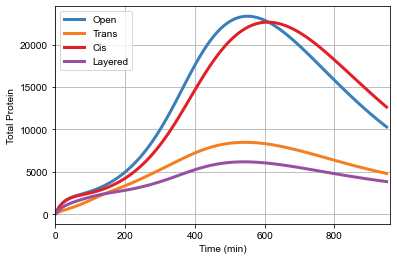

In [101]:
# Plot the total recombinant protein

fig, ax = plt.subplots(1,1, figsize = (6,4))
     

# r = 0
ax.plot(time[:tf_i], P_total_open[:tf_i], label = 'Open', color = construct_colors['Open'], linewidth = lwd)
ax.plot(time[:tf_i], P_total_trans[:tf_i], label = 'Trans', color = construct_colors['Trans'], linewidth = lwd)
ax.plot(time[:tf_i], P_total_cis[:tf_i], label = 'Cis', color = construct_colors['Cis'], linewidth = lwd)
ax.plot(time[:tf_i], P_total_layered[:tf_i], label = 'Layered', color = construct_colors['Layered'], linewidth = lwd)
ax.legend() ; 
ax.grid()
ax.set_xlabel('Time (min)') ; ax.set_ylabel('Total Protein')
ax.set_xlim((0,960))

In [102]:
## View and save all the parameters 

param_dict = params.valuesdict()
# param_dict_guess_df = dict()
# param_dict_guess_df['Param name'] = param_dict.keys()
# param_dict_guess_df['Param'] = param_dict.values()
# param_data = pd.DataFrame(data = param_dict_guess_df)
# param_data.to_csv('LCM_param_guess_041425_v4.csv')
param_dict

{'beta_A': 0.14,
 'K_x': 14000.0,
 'K_R': 45.0,
 'K_lac': 153.0,
 'd_m': 0.053,
 'k_tl_cin': 3.0,
 'd_p': 0.0099,
 'K_r': 0.86,
 'beta_B': 0.12,
 'K_cin': 618.0,
 'd_r': 0.05,
 'k_fold_fp': 0.14,
 'k_fold_lac': 0.01,
 'x_i': 2000000.0,
 'k_tl_fp': 0.2,
 'k_tl_lac': 2.78,
 'k_fold_r': 0.11,
 'l0_Pcin': 0.098,
 'Rsrc_max': 420.0,
 'k_tli_b_lac': 0.0099,
 'k_tli_b_fp': 0.022,
 'k_tli_b_cin': 0.071,
 'k_tli_u': 7.0,
 'b_fold': 0.1,
 'K_P_total': 3800.0,
 'K_R_total': 157.0,
 'n_gamma_resources_tx': 0.25,
 'n_gamma_resources_tl': 0.4,
 'n_gamma_rate': 0.065,
 'CinR_0': 10.0,
 'LacI_0': 24.0,
 'FP_0': 0.0,
 'Mcin_0': 20.0,
 'Mg_0': 7.0,
 'C_max': 668712500.0,
 'C_0': 10387499.0,
 'k_gr': 0.013,
 'n_Cin_actn': 3.0,
 'n_Rhl_actn': 3.0,
 'n_Hill_delta': 5,
 'n_Hill_psi': 3.0,
 'n_Hill_trans': 3.0,
 'n_Hill_cis': 3.0,
 'r_Lac': 0.09,
 'r_R': 0.023,
 'r_Cin': 0.067}

### Plot the concentration of each species in each of the construct

In [103]:
# Load growth data for RMF gamma to print the species

C = sol_deg_open[:,10]
C_max = param_dict['C_max']
f = C/C_max
y = f * (1 - f)

Text(0.5, 1.0, 'Total Rsrc')

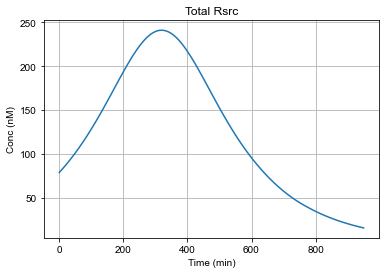

In [104]:
Rsrc_total = param_dict['Rsrc_max'] * np.power(y, param_dict['n_gamma_resources_tl'])
plt.plot(time[:tf_i], Rsrc_total[:tf_i], label = 'Total Rsrc')
plt.xlabel('Time (min)') ; plt.ylabel('Conc (nM)')
plt.grid() ; plt.title('Total Rsrc')

In [105]:
species_names = ['M_cin', 'P_cin', 'C_cin', 'Mg', 'R', 'Rm', 'P_lac', 'Pm_lac', 
                 'P_fp', 'Pm_fp', 'Cells']

Cells below print all the species in each loop strategy

Text(0.5, 0.95, 'All Species with Open Loop')

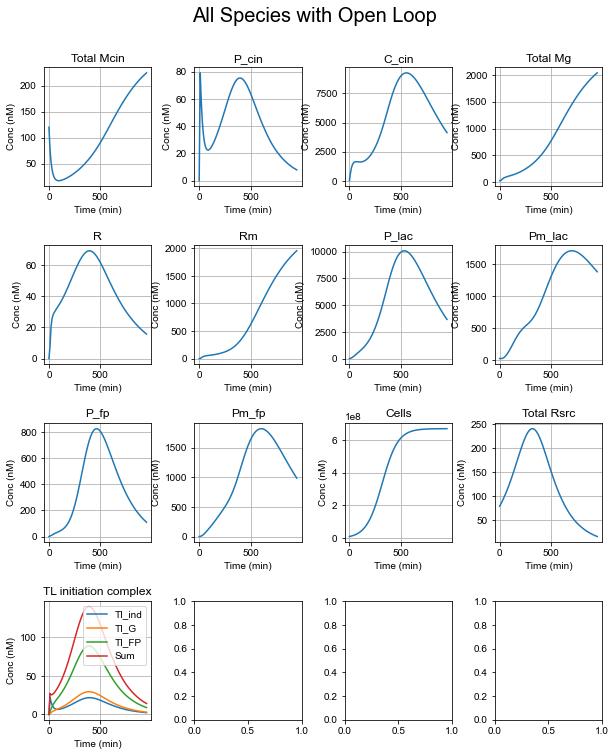

In [106]:
n1 = 4 ; n2 = 4 ; 
fig, ax = plt.subplots(n1,n2, figsize = (10,12))
fig.subplots_adjust(wspace = 0.4, hspace = 0.5)

indices = [[l, k] for l in range(n1) for k in range(n2)]

for i in range(13):

    r,c = indices[i]

    if i == 0:
        Mcin_total = sol_deg_open[:,0][:tf_i] + sol_deg_open[:,11][:tf_i]
        ax[r,c].plot(time[:tf_i], Mcin_total, label = 'Total Mcin')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('Total Mcin')
        continue

    if i == 3:
        Mg_total = sol_deg_open[:,3][:tf_i] + sol_deg_open[:,12][:tf_i] + sol_deg_open[:,13][:tf_i]
        ax[r,c].plot(time[:tf_i], Mg_total, label = 'Total Mg')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('Total Mg')
        continue

    if i == 11:
        Rsrc_total = param_dict['Rsrc_max'] * np.power(y, param_dict['n_gamma_resources_tl'])
        ax[r,c].plot(time[:tf_i], Rsrc_total[:tf_i], label = 'Total Rsrc')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('Total Rsrc')
        continue

    if i == 12:
        ax[r,c].plot(time[:tf_i], sol_deg_open[:,11][:tf_i], label = 'TI_ind')
        ax[r,c].plot(time[:tf_i], sol_deg_open[:,12][:tf_i], label = 'TI_G')
        ax[r,c].plot(time[:tf_i], sol_deg_open[:,13][:tf_i], label = 'TI_FP')
        ax[r,c].plot(time[:tf_i], sol_deg_open[:,13][:tf_i] + sol_deg_open[:,11][:tf_i] + sol_deg_open[:,12][:tf_i], label = 'Sum')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('TL initiation complex') ; ax[r,c].legend()
        break
        
    if not i == 11 or i == 12:

        ax[r,c].plot(time[:tf_i], sol_deg_open[:,i][:tf_i], label = species_names[i])
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title(species_names[i])

fig.suptitle('All Species with Open Loop', fontsize = 20, y = 0.95)                                                       

Text(0.5, 0.95, 'All Species with Trans Loop')

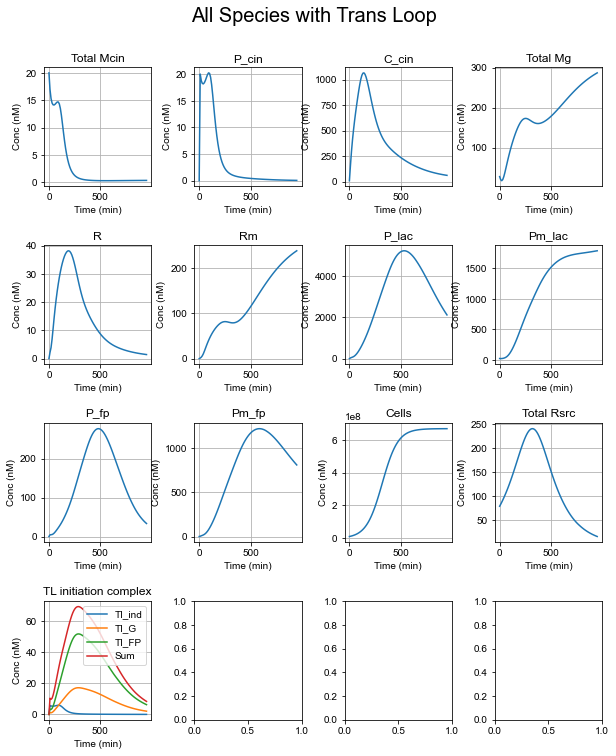

In [107]:
n1 = 4 ; n2 = 4 ; 
fig, ax = plt.subplots(n1,n2, figsize = (10,12))
fig.subplots_adjust(wspace = 0.4, hspace = 0.5)

indices = [[l, k] for l in range(n1) for k in range(n2)]

for i in range(13):
    r,c = indices[i]

    if i == 0:
        Mcin_total = sol_deg_trans[:,0][:tf_i] + sol_deg_trans[:,11][:tf_i]
        ax[r,c].plot(time[:tf_i], Mcin_total, label = 'Total Mcin')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('Total Mcin')
        continue

    if i == 3:
        Mg_total = sol_deg_trans[:,3][:tf_i] + sol_deg_trans[:,12][:tf_i] + sol_deg_trans[:,13][:tf_i]
        ax[r,c].plot(time[:tf_i], Mg_total, label = 'Total Mg')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('Total Mg')
        continue
    
    if i == 11:
        Rsrc_total = param_dict['Rsrc_max'] * np.power(y, param_dict['n_gamma_resources_tl'])
        ax[r,c].plot(time[:tf_i], Rsrc_total[:tf_i], label = 'Total Rsrc')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('Total Rsrc')
        pass

    if i == 12:
        ax[r,c].plot(time[:tf_i], sol_deg_trans[:,11][:tf_i], label = 'TI_ind')
        ax[r,c].plot(time[:tf_i], sol_deg_trans[:,12][:tf_i], label = 'TI_G')
        ax[r,c].plot(time[:tf_i], sol_deg_trans[:,13][:tf_i], label = 'TI_FP')
        ax[r,c].plot(time[:tf_i], sol_deg_trans[:,13][:tf_i] + sol_deg_trans[:,11][:tf_i] + sol_deg_trans[:,12][:tf_i], label = 'Sum')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('TL initiation complex') ; ax[r,c].legend()
        break
        
    if not i == 11 or i == 12:

        ax[r,c].plot(time[:tf_i], sol_deg_trans[:,i][:tf_i], label = species_names[i])
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title(species_names[i])

fig.suptitle('All Species with Trans Loop', fontsize = 20, y = 0.95)                                                       

Text(0.5, 0.95, 'All Species with Cis Loop')

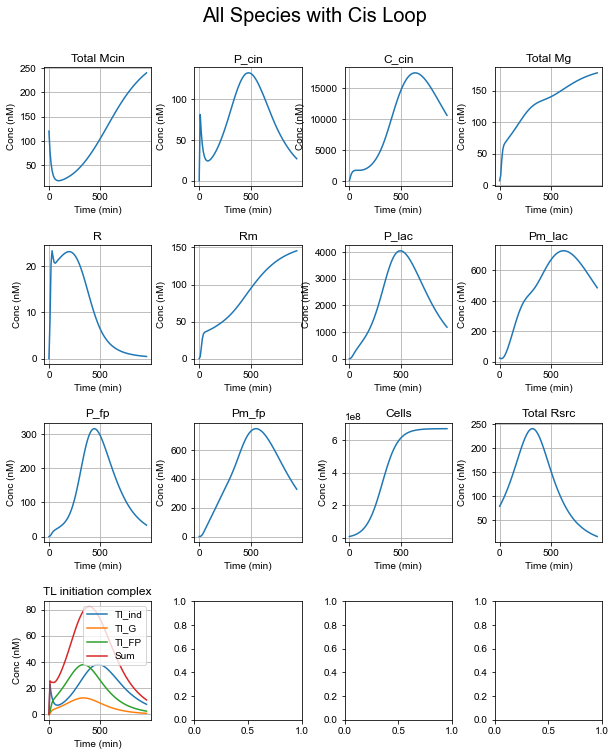

In [108]:
n1 = 4 ; n2 = 4 ; 
fig, ax = plt.subplots(n1,n2, figsize = (10,12))
fig.subplots_adjust(wspace = 0.4, hspace = 0.5)

indices = [[l, k] for l in range(n1) for k in range(n2)]

for i in range(13):
    r,c = indices[i]

    if i == 0:
        Mcin_total = sol_deg_cis[:,0][:tf_i] + sol_deg_cis[:,11][:tf_i]
        ax[r,c].plot(time[:tf_i], Mcin_total, label = 'Total Mcin')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('Total Mcin')
        continue

    if i == 3:
        Mg_total = sol_deg_cis[:,3][:tf_i] + sol_deg_cis[:,12][:tf_i] + sol_deg_cis[:,13][:tf_i]
        ax[r,c].plot(time[:tf_i], Mg_total, label = 'Total Mg')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('Total Mg')
        continue

    if i == 11:
        Rsrc_total = param_dict['Rsrc_max'] * np.power(y, param_dict['n_gamma_resources_tl'])
        ax[r,c].plot(time[:tf_i], Rsrc_total[:tf_i], label = 'Total Rsrc')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('Total Rsrc')
        pass

    if i == 12:
        ax[r,c].plot(time[:tf_i], sol_deg_cis[:,11][:tf_i], label = 'TI_ind')
        ax[r,c].plot(time[:tf_i], sol_deg_cis[:,12][:tf_i], label = 'TI_G')
        ax[r,c].plot(time[:tf_i], sol_deg_cis[:,13][:tf_i], label = 'TI_FP')
        ax[r,c].plot(time[:tf_i], sol_deg_cis[:,13][:tf_i] + sol_deg_cis[:,11][:tf_i] + sol_deg_cis[:,12][:tf_i], label = 'Sum')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('TL initiation complex') ; ax[r,c].legend()
        break
        
    if not i == 11 or i == 12:

        ax[r,c].plot(time[:tf_i], sol_deg_cis[:,i][:tf_i], label = species_names[i])
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title(species_names[i])


fig.suptitle('All Species with Cis Loop', fontsize = 20, y = 0.95)                                                       

Text(0.5, 0.95, 'All Species with Layered Loop')

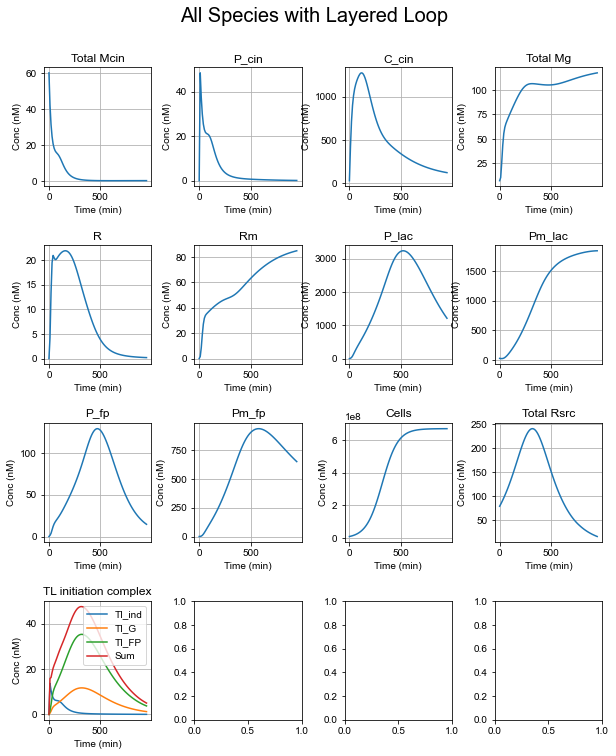

In [109]:
n1 = 4 ; n2 = 4 ; 
fig, ax = plt.subplots(n1,n2, figsize = (10,12))
fig.subplots_adjust(wspace = 0.4, hspace = 0.5)

indices = [[l, k] for l in range(n1) for k in range(n2)]

for i in range(13):
    r,c = indices[i]

    if i == 0:
        Mcin_total = sol_deg_layered[:,0][:tf_i] + sol_deg_layered[:,11][:tf_i]
        ax[r,c].plot(time[:tf_i], Mcin_total, label = 'Total Mcin')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('Total Mcin')
        continue

    if i == 3:
        Mg_total = sol_deg_layered[:,3][:tf_i] + sol_deg_layered[:,12][:tf_i] + sol_deg_layered[:,13][:tf_i]
        ax[r,c].plot(time[:tf_i], Mg_total, label = 'Total Mg')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('Total Mg')
        continue

    if i == 11:
        Rsrc_total = param_dict['Rsrc_max'] * np.power(y, param_dict['n_gamma_resources_tl'])
        ax[r,c].plot(time[:tf_i], Rsrc_total[:tf_i], label = 'Total Rsrc')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('Total Rsrc')
        pass

    if i == 12:
        ax[r,c].plot(time[:tf_i], sol_deg_layered[:,11][:tf_i], label = 'TI_ind')
        ax[r,c].plot(time[:tf_i], sol_deg_layered[:,12][:tf_i], label = 'TI_G')
        ax[r,c].plot(time[:tf_i], sol_deg_layered[:,13][:tf_i], label = 'TI_FP')
        ax[r,c].plot(time[:tf_i], sol_deg_layered[:,13][:tf_i] + sol_deg_layered[:,11][:tf_i] + sol_deg_layered[:,12][:tf_i], label = 'Sum')
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title('TL initiation complex') ; ax[r,c].legend()
        break
        
    if not i == 11 or i == 12:

        ax[r,c].plot(time[:tf_i], sol_deg_layered[:,i][:tf_i], label = species_names[i])
        ax[r,c].set_xlabel('Time (min)') ; ax[r,c].set_ylabel('Conc (nM)')
        ax[r,c].grid() ; ax[r,c].set_title(species_names[i])


fig.suptitle('All Species with Layered Loop', fontsize = 20, y = 0.95)                                                       

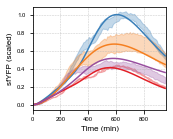

In [110]:
## Ploting figure for publication (Figure 5)

# ==== Font size settings ====
label_fontsize = 8
tick_fontsize = 6
legend_fontsize = 6
title_fontsize = 6

# ==== Create single subplot ====
fig, ax = plt.subplots(figsize=(2.4, 1.9))  # One subplot only

# ==== Plot experimental data (normalized fluorescence) ====
transparency = 0.3
size = 0.3
marker = 'o'

# for i in range(5):
#     ax.scatter(time_expt[:tf_I], FL_open[i][:tf_I]/max_FL_open_avg, color=construct_colors['Open'],
#                label='Open' if i == 0 else "_nolegend_", alpha=transparency, s=size, marker=marker)
#     ax.scatter(time_expt[:tf_I], FL_trans[i][:tf_I]/max_FL_open_avg, color=construct_colors['Trans'],
#                label='Trans' if i == 0 else "_nolegend_", alpha=transparency, s=size, marker=marker)
#     ax.scatter(time_expt[:tf_I], FL_cis[i][:tf_I]/max_FL_open_avg, color=construct_colors['Cis'],
#                label='Cis' if i == 0 else "_nolegend_", alpha=transparency, s=size, marker=marker)

# for i in range(4):
#     ax.scatter(time_expt[:tf_I], FL_layered[i][:tf_I]/max_FL_open_avg, color=construct_colors['Layered'],
#                label='Layered' if i == 0 else "_nolegend_", alpha=transparency, s=size, marker=marker)

ax.fill_between(time[:tf_i], open_lower_limit[:tf_i]/max_FL_open_avg, open_upper_limit[:tf_i]/max_FL_open_avg, color = construct_colors['Open'], alpha = transparency)
ax.fill_between(time[:tf_i], trans_lower_limit[:tf_i]/max_FL_open_avg, trans_upper_limit[:tf_i]/max_FL_open_avg, color = construct_colors['Trans'], alpha = transparency)
ax.fill_between(time[:tf_i], cis_lower_limit[:tf_i]/max_FL_open_avg, cis_upper_limit[:tf_i]/max_FL_open_avg, color = construct_colors['Cis'], alpha = transparency)
ax.fill_between(time[:tf_i], layered_lower_limit[:tf_i]/max_FL_open_avg, layered_upper_limit[:tf_i]/max_FL_open_avg, color = construct_colors['Layered'], alpha = transparency)

# ==== Plot model fits ====
lwd = 1.5
max_open_fp = np.max(sol_deg_open[:, 9][:tf_i])

ax.plot(time[:tf_i], sol_deg_open[:,9][:tf_i]/max_open_fp, color=construct_colors['Open'], linewidth=lwd)
ax.plot(time[:tf_i], sol_deg_trans[:,9][:tf_i]/max_open_fp, color=construct_colors['Trans'], linewidth=lwd)
ax.plot(time[:tf_i], sol_deg_cis[:,9][:tf_i]/max_open_fp, color=construct_colors['Cis'], linewidth=lwd)
ax.plot(time[:tf_i], sol_deg_layered[:,9][:tf_i]/max_open_fp, color=construct_colors['Layered'], linewidth=lwd)

# ==== Aesthetic formatting ====
ax.set_xlim((0, 960))
ax.set_xlabel('Time (min)', fontsize=label_fontsize)
ax.set_ylabel('sfYFP (scaled)', fontsize=label_fontsize)
ax.tick_params(labelsize=tick_fontsize)
#ax.legend(fontsize=legend_fontsize, frameon=False)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Optional: apply font globally
plt.rcParams['font.family'] = 'Arial'

# plt.tight_layout()
# Optional save:
#plt.savefig('Layered_control_prediction.svg', dpi=300, bbox_inches='tight')
#plt.show()

<ipython-input-111-2a19407487d6>:21: RuntimeWarning: invalid value encountered in true_divide
  frac_cin = TI_cin / total_TI
<ipython-input-111-2a19407487d6>:22: RuntimeWarning: invalid value encountered in true_divide
  frac_lac = TI_lac / total_TI
<ipython-input-111-2a19407487d6>:23: RuntimeWarning: invalid value encountered in true_divide
  frac_fp  = TI_fp / total_TI


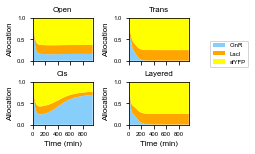

In [111]:
## Ploting figure for publication (Figure 5)

fig, axes = plt.subplots(2, 2, figsize=(2.8, 1.9))  # Smaller figure size
# fig.subplots_adjust(wspace = 0.2, hspace = 0.2)

construct_names = ['Open', 'Trans', 'Cis', 'Layered']
sols = [sol_deg_open, sol_deg_trans, sol_deg_cis, sol_deg_layered]

# Font size settings
title_fontsize = 8
label_fontsize = 8
tick_fontsize = 6
legend_fontsize = 6

for ax, construct_name, sol in zip(axes.flatten(), construct_names, sols):
    TI_cin = sol[:,11]
    TI_lac = sol[:,12]
    TI_fp  = sol[:,13]

    total_TI = TI_cin + TI_lac + TI_fp
    frac_cin = TI_cin / total_TI
    frac_lac = TI_lac / total_TI
    frac_fp  = TI_fp / total_TI

    ax.stackplot(time, frac_cin, frac_lac, frac_fp,
                 colors = ['lightskyblue', 'orange', 'yellow'])
    ax.set_xticks([0, 200, 400, 600, 800])

    ax.set_title(f'{construct_name}', fontsize=title_fontsize)
    ax.set_xlabel('Time (min)', fontsize=label_fontsize)
    ax.set_ylabel('Allocation', fontsize=label_fontsize)
    ax.tick_params(labelsize = tick_fontsize)
    ax.set_ylim(0, 1)  # Consistent y-axis for comparison
    ax.set_xlim((0, 960))  # Consistent x-axis for comparison



# Hide x-axis labels on top row
for ax in axes[0, :]:  # top row
    ax.set_xlabel('')
    ax.tick_params(labelbottom = False)  # hides tick labels too

# Common legend below the plots
fig.legend(['CinR', 'LacI', 'sfYFP'], loc='lower center', ncol=1,
           fontsize=legend_fontsize, bbox_to_anchor=(1.1, 0.5))

plt.subplots_adjust(wspace = 0.6, hspace = 0.5, bottom = 0.1)  # Adjust spacing and bottom for legend
#plt.tight_layout()
#plt.savefig('Resource_allocation_plot.svg', dpi=300, bbox_inches='tight')
#plt.show()

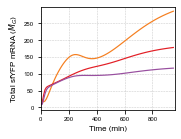

In [112]:
## Ploting figure for publication (Figure 5)

# ==== Font size settings ====
title_fontsize = 8
label_fontsize = 8
tick_fontsize = 6
legend_fontsize = 6

# ==== Local construct subset (no conflict with global names) ====
subset_constructs_yfp = ['Trans', 'Cis', 'Layered']
subset_indices_yfp = [1, 2, 3]  # Corresponding indices in `sols`

# ==== Extract sfYFP mRNA (M_G = Mg + TI_fp) ====
M_G_subset = [sols[i][:, 3] + sols[i][:, 13] for i in subset_indices_yfp]

# ==== Create single subplot ====
fig, ax = plt.subplots(figsize=(2.4, 1.9))  # One subplot only

# Regular line plots
for name, MG, color in zip(subset_constructs_yfp, M_G_subset, 
                           [construct_colors[name] for name in subset_constructs_yfp]):
    ax.plot(time[:tf_i], MG[:tf_i], label=name, color=color, linewidth=1.2)

# Labels and Title
ax.set_xlabel('Time (min)', fontsize=label_fontsize)
ax.set_ylabel('Total sfYFP mRNA ($M_G$)', fontsize=label_fontsize)
#ax.set_title('sfYFP mRNA Dynamics', fontsize=title_fontsize)
ax.set_xlim((0, 960))  # Consistent x-axis

# Ticks
ax.tick_params(axis='both', labelsize=tick_fontsize)

# Legend
#ax.legend(loc='upper left', fontsize=legend_fontsize, frameon=False)

# Grid
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Optional font styling
plt.rcParams['font.family'] = 'Arial'

# Layout
#plt.tight_layout()

# Optional save
#plt.savefig('sfYFP_mRNA_dynamics_trans_cis_layered.svg', dpi=300, bbox_inches='tight')

plt.show()


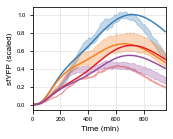

In [113]:
## Ploting figure for publication (Figure 5)

# Load the data from the txt file
data = pd.read_csv('paper_controller_profile.txt')  # Adjust delimiter if necessary
data = data.to_numpy()

# Extract columns
open_data = data[:, 0]
trans_data = data[:, 2]
cis_data = data[:, 1]
layered_data = data[:, 3]

# ==== Font size settings ====
label_fontsize = 8
tick_fontsize = 6
legend_fontsize = 6
title_fontsize = 6

# ==== Create single subplot ====
fig, ax = plt.subplots(figsize=(2.4, 1.9))  # One subplot only

# ==== Plot experimental data (normalized fluorescence) ====
transparency = 0.3
size = 0.3
marker = 'o'


ax.fill_between(time[:tf_i], open_lower_limit[:tf_i]/max_FL_open_avg, open_upper_limit[:tf_i]/max_FL_open_avg, color = construct_colors['Open'], alpha = transparency)
ax.fill_between(time[:tf_i], trans_lower_limit[:tf_i]/max_FL_open_avg, trans_upper_limit[:tf_i]/max_FL_open_avg, color = construct_colors['Trans'], alpha = transparency)
ax.fill_between(time[:tf_i], cis_lower_limit[:tf_i]/max_FL_open_avg, cis_upper_limit[:tf_i]/max_FL_open_avg, color = construct_colors['Cis'], alpha = transparency)
ax.fill_between(time[:tf_i], layered_lower_limit[:tf_i]/max_FL_open_avg, layered_upper_limit[:tf_i]/max_FL_open_avg, color = construct_colors['Layered'], alpha = transparency)

# ==== Plot model fits ====
lwd = 1.5
max_open_fp = np.max(sol_deg_open[:, 9][:tf_i])

# Plot model data
ax.plot(time[:95], open_data / np.max(open_data), label='Open (Model)', color=construct_colors['Open'], linewidth=lwd)
ax.plot(time[:95], trans_data / np.max(open_data), label='Trans (Model)', color=construct_colors['Trans'], linewidth=lwd)
ax.plot(time[:95], cis_data / np.max(open_data), label='Cis (Model)', color=construct_colors['Cis'], linewidth=lwd)
ax.plot(time[:95], layered_data / np.max(open_data), label='Layered (Model)', color=construct_colors['Layered'], linewidth=lwd)

# ==== Aesthetic formatting ====
ax.set_xlim((0, 960))
ax.set_xlabel('Time (min)', fontsize=label_fontsize)
ax.set_ylabel('sfYFP (scaled)', fontsize=label_fontsize)
ax.tick_params(labelsize=tick_fontsize)
#ax.legend(fontsize=legend_fontsize, frameon=False)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

#plt.savefig('Layered_control_paper_profile.svg', dpi=300, bbox_inches='tight')

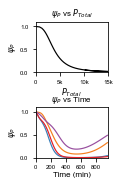

In [114]:
## Ploting figure for publication (Figure 5)
# Plotting RMF ψₚ (psi_P) over time and total protein for 4 constructs (2x1 layout)

# Custom formatter to display numbers as 'k'
def thousands_formatter(x, pos):
    if x == 0:
        return '0'
    else:
        return f'{int(x/1000)}k'

fig, axes = plt.subplots(2, 1, figsize=(1.3, 2.5))
fig.subplots_adjust(hspace=0.7)

# Construct metadata
construct_names = ['Open', 'Trans', 'Cis', 'Layered']
sols = [sol_deg_open, sol_deg_trans, sol_deg_cis, sol_deg_layered]
colors = [construct_colors[name] for name in construct_names]

# Plotting settings
title_fontsize = 8
label_fontsize = 8
tick_fontsize = 6
legend_fontsize = 6
lwd = 1.2  # line width

for name, sol, color in zip(construct_names, sols, colors):
    # Compute total protein
    P_total = sol[:, 1] + sol[:, 2] + sol[:, 6] + sol[:, 7] + sol[:, 8] + sol[:, 9]

    # Compute ψₚ (psi_P) based on Hill function
    psi_P = param_dict['K_P_total']**param_dict['n_Hill_psi'] / (
            param_dict['K_P_total']**param_dict['n_Hill_psi'] + P_total**param_dict['n_Hill_psi'])

    # --- Top Plot: ψₚ vs P_total only for open loop---
    if name == 'Open':
        axes[0].plot(P_total[:tf_i], psi_P[:tf_i], color='k', linewidth=lwd, label=name)

    # --- Bottom Plot: ψₚ vs Time ---
    axes[1].plot(time[:tf_i], psi_P[:tf_i], color=color, linewidth=lwd, label=name)

# --- Formatting Top Plot (ψₚ vs P_total) ---
axes[0].set_title(r'$\psi_{P}$ vs $P_{Total}$', fontsize=title_fontsize)
axes[0].set_ylabel(r'$\psi_{P}$', fontsize=label_fontsize, labelpad=2)
axes[0].set_xlabel(r'$P_{Total}$', fontsize=label_fontsize, labelpad=2)
axes[0].set_xticks([0, 5000, 10000, 15000])
axes[0].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
axes[0].set_ylim((0, 1.1)) 
axes[0].set_xlim((0, 15000))
axes[0].tick_params(labelsize=tick_fontsize)

# --- Formatting Bottom Plot (ψₚ vs Time) ---
axes[1].set_title(r'$\psi_{P}$ vs Time', fontsize=title_fontsize)
axes[1].set_ylabel(r'$\psi_{P}$', fontsize=label_fontsize, labelpad=2)
axes[1].set_xlabel(r'Time (min)', fontsize=label_fontsize, labelpad=2)
axes[1].set_xlim((0, 960))
axes[1].set_ylim((0, 1.1))
axes[1].set_xticks([0, 200, 400, 600, 800])
axes[1].tick_params(labelsize=tick_fontsize)

#plt.savefig('psi_vs_resource_time.svg', dpi=300, bbox_inches='tight')
